# Приоритизация гипотез и анализ A/B-теста

Вместе с отделом маркетинга крупного интернет-магазина был подготовилен список из 9 гипотез для увеличения выручки.
Необходимо приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты. 

**Цель исследования:** 
Проанализировать результаты A/B-теста, сделать выводы и дать необходимые рекомендации по увеличению выручки.

**Ход исследования:**
Данные представлены в 3 таблицах: `hypothesis.csv`, `orders.csv`, `visitors.csv`. О качестве данных ничего не известно, поэтому потребуется предобработка данных.

Исследование пройдет в 5 этапов:

- обзор данных;
- предобработка данных;
- приоритизация гипотез;
- графический анализ метрик;
- проверка гипотез.


<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Обзор-данных" data-toc-modified-id="Обзор-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Обзор данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Проверка-данных-на-аномалии" data-toc-modified-id="Проверка-данных-на-аномалии-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Проверка данных на аномалии</a></span></li><li><span><a href="#Изменение-типов-данных" data-toc-modified-id="Изменение-типов-данных-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Изменение типов данных</a></span></li><li><span><a href="#Удаление-дубликатов" data-toc-modified-id="Удаление-дубликатов-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Удаление дубликатов</a></span></li></ul></li><li><span><a href="#Приоритизация-гипотез" data-toc-modified-id="Приоритизация-гипотез-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Приоритизация гипотез</a></span></li><li><span><a href="#Графический-анализ-метрик" data-toc-modified-id="Графический-анализ-метрик-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Графический анализ метрик</a></span></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Проверка гипотез</a></span><ul class="toc-item"><li><span><a href="#Определение-аномального-количества-заказов" data-toc-modified-id="Определение-аномального-количества-заказов-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Определение аномального количества заказов</a></span></li><li><span><a href="#Определение-аномальной-стоимости-заказов" data-toc-modified-id="Определение-аномальной-стоимости-заказов-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Определение аномальной стоимости заказов</a></span></li><li><span><a href="#Проверка-гипотез-по-&quot;сырым&quot;-данным" data-toc-modified-id="Проверка-гипотез-по-&quot;сырым&quot;-данным-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Проверка гипотез по "сырым" данным</a></span></li><li><span><a href="#Проверка-гипотез-по-&quot;очищенным&quot;-данным" data-toc-modified-id="Проверка-гипотез-по-&quot;очищенным&quot;-данным-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Проверка гипотез по "очищенным" данным</a></span></li></ul></li><li><span><a href="#Итоги-исследования" data-toc-modified-id="Итоги-исследования-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Итоги исследования</a></span></li></ul></div>

## Обзор данных

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math as mth
from scipy import stats as st
from pandas.plotting import register_matplotlib_converters
import warnings
# конвертеры, которые позволяют использовать типы pandas в matplotlib  
register_matplotlib_converters()
# полное отображение содержимого ячейки
pd.set_option('display.max_colwidth', None)

In [2]:
try: 
    hypothesis, orders, visitors = (
    pd.read_csv('C:/Users/Anna/Desktop/Обучение/Яндекс практикум/Проект 7/hypothesis.csv'),  # журнал гипотез
    pd.read_csv('C:/Users/Anna/Desktop/Обучение/Яндекс практикум/Проект 7/orders.csv'),  # заказы
    pd.read_csv('C:/Users/Anna/Desktop/Обучение/Яндекс практикум/Проект 7/visitors.csv'),  # пользователи
)
    
except FileNotFoundError:
    hypothesis, orders, visitors = (
    pd.read_csv('/datasets/hypothesis.csv'),  # журнал гипотез
    pd.read_csv('/datasets/orders.csv'),  # заказы
    pd.read_csv('/datasets/visitors.csv'),  # пользователи
)

In [3]:
# cоздаем функцию для обзора данных 
def info_table(table):
    display(table.head(10))
    print(table.info())

In [4]:
info_table(hypothesis) # обзор данных таблицы hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes
None


В таблице **hypothesis** собраны данные о 9 гипотезах по увеличению выручки интернет-магазина. Таблица содержит 5 столбцов, 9 строк, тип данных представленный в таблице object, int64.

Согласно документации к таблице:

- `Hypothesis` — краткое описание гипотезы;
- `Reach` — охват пользователей по 10-балльной шкале;
- `Impact` — влияние на пользователей по 10-балльной шкале;
- `Confidence` — уверенность в гипотезе по 10-балльной шкале;
- `Efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

Тип данных в таблице соответствует описанию и не требует замены. Пропущенные данные в столбцах отсутствуют. Требуется переименования столбцов в соответствии с хорошим стилем.

In [5]:
info_table(orders) # обзор данных таблицы orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
None


В таблице **orders** 5 столбцов и 1197 строк, тип данных представленный в таблице object, int64. 

Согласно документации к таблице:
- `transactionId` — идентификатор заказа;
- `visitorId` — идентификатор пользователя, совершившего заказ;
- `date` — дата, когда был совершён заказ;
- `revenue` — выручка заказа;
- `group` — группа A/B-теста, в которую попал заказ.

Пропущенные данные в столбцах отсутствуют. Требуется переименования столбцов в соответствии с хорошим стилем, а также замена типа данных в столбце `date` на datetime64. 

In [6]:
info_table(visitors) # обзор данных таблицы visitors

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
None


В таблице **visitors** 3 столбца и 62 строки, тип данных представленный в таблице object, int64. 

Согласно документации к таблице:
- `date` — дата;
- `group` — группа A/B-теста;
- `visitors` — количество пользователей в указанную дату в указанной группе A/B-теста.

Пропущенные данные в столбцах отсутствуют. Требуется замена типа данных в столбце `date` на datetime64. 

**Выводы:** 
Данные представлены в 3 таблицах:

Таблица **hypothesis** - гипотезы по увеличению выручки интернет-магазина, содержит краткое описание гипотезы, рейтинг по 10_бальной шкале охвата пользователей, влияния на пользователей, уверенности в гипотезе, затрат ресурсов на проверку гипотезы,  
Таблица **orders** (информация о заказах) - заказы, содержит данные о заказах и пользователях, совершивших заказ, дату, выручку и группу A/B-теста заказа.

Таблица **visitors** - информация о количестве пользователей, совершивших заказ, содержит дату, группу A/B-теста, количество пользователей в указанную дату в указанной группе A/B-теста.

Обнаружены:

- некорректные написания заголовков столбцов (необходимо привести в соответствие с хорошим стилем),
- даты в таблицах необходимо привести к типу datetime64.

## Предобработка данных

Сначала приведем все названия столбцов таблиц **hypothesis** и **orders**, к нижнему регистру.

In [7]:
# приводим названия столбцов к нижнему регистру 

hypothesis.columns = hypothesis.columns.str.lower() 
orders.columns = orders.columns.str.lower() 

# проверяем произведенные изменения
display(hypothesis.head(0))
display(orders.head(0))

,hypothesis,reach,impact,confidence,efforts


,transactionid,visitorid,date,revenue,group


### Проверка данных на аномалии

Проверим на наличие аномалий таблицы **orders** и **visitors**.
Для проверки данных на аномалии воспользуемся методом describe() с параметром 'include', чтобы получить описание в столбцах, содержащих не только количественные, но и качественные данные. 

In [8]:
orders.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
transactionid,1197.0,NaN,NaN,NaN,2155621385.529657,1229084904.760058,1062393.0,1166775572.0,2145193898.0,3237740112.0,4293855558.0
visitorid,1197.0,NaN,NaN,NaN,2165960143.099415,1236014192.14687,5114589.0,1111826046.0,2217984702.0,3177606451.0,4283872382.0
date,1197,31,2019-08-05,48,NaN,NaN,NaN,NaN,NaN,NaN,NaN
revenue,1197.0,NaN,NaN,NaN,8348.005848,39191.131774,50.0,1220.0,2978.0,8290.0,1294500.0
group,1197,2,B,640,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
visitors.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
date,62,31,2019-08-01,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
group,62,2,A,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
visitors,62.0,NaN,NaN,NaN,607.290323,114.40056,361.0,534.0,624.5,710.5,770.0


Число дней исследования - 31, число групп исследования соответствует заданию - 2 группы(A, B). Преобладают значения группы B (640). Значения в столбце `revenue` от 50 до 1294500, со средним на уровне 8348 может указывать на наличие выбросов.

### Изменение типов данных

In [10]:
# преобразование данных о дате
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

# проверяем произведенные изменения
display(orders.dtypes, 
      visitors.dtypes)

transactionid             int64
visitorid                 int64
date             datetime64[ns]
revenue                   int64
group                    object
dtype: object

date        datetime64[ns]
group               object
visitors             int64
dtype: object

Данные приведены к типу datetime64.

### Удаление дубликатов

Подсчитаем количество явных дубликатов данных в таблицах **orders** и **visitors**.

In [11]:
orders.duplicated().sum()

0

In [12]:
visitors.duplicated().sum()

0

Дубликатов в данных не обнаружено.

Рассчитаем количество пользователей в каждой группе, чтобы убедиться в правильном соотношении распределения пользователей.

In [13]:
print("Доля пользователей в группе 'A':", "{0: .0%}".format(orders[orders['group']=='A']['visitorid'].count()/len(orders)))
print("Доля пользователей в группе 'B':", "{0: .0%}".format(orders[orders['group']=='B']['visitorid'].count()/len(orders)))

Доля пользователей в группе 'A':  47%
Доля пользователей в группе 'B':  53%


Проверим все ли пользователи относятся только к одной группе теста.

In [14]:
# список уникальных id пользователей по грппам
group_A = orders[orders['group']=='A']['visitorid']
group_B = orders[orders['group']=='B']['visitorid'] 

print('Количество уникальных пользователей:', orders['visitorid'].nunique())
print('Количество уникальных пользователей группы A:', group_A.nunique())
print('Количество уникальных пользователей группы B:', group_B.nunique())


Количество уникальных пользователей: 1031
Количество уникальных пользователей группы A: 503
Количество уникальных пользователей группы B: 586


In [15]:
# сравниваем уникальных пользователей группы A и B, удаляем пользователей, которые присутствуют в обоих группах
a_b_visitor = np.intersect1d(orders.query('group == "A"')['visitorid'].unique(),
                                  orders.query('group == "B"')['visitorid'].unique())
orders = orders[~orders['visitorid'].isin(a_b_visitor)]

In [16]:
# проверили количество уникальных пользователей, совершивших покупки
orders['visitorid'].nunique()

973

In [17]:
# проверили соотношение пользователей после удаления повторяющихся пользователей
print("Доля пользователей в группе 'A':", "{0: .0%}".format(orders[orders['group']=='A']['visitorid'].count()/len(orders)))
print("Доля пользователей в группе 'B':", "{0: .0%}".format(orders[orders['group']=='B']['visitorid'].count()/len(orders)))

Доля пользователей в группе 'A':  46%
Доля пользователей в группе 'B':  54%


**Выводы:**
- Привели названия столбцов таблиц **hypothesis и orders**, к нижнему регистру.
- Проверили данные на аномалии. Аномалий не обнаружено. Число дней исследования - 31, число групп исследования соответствует заданию - 2 группы(A, B). Преобладают значения группы B (640). Значения в столбце revenue от 50 до 1294500, со средним на уровне 8348 может указывать на наличие выбросов.
- Привели даты в таблицах к типу datetime64.  
- Дубликатов в таблицах не обнаружено.
- Доли пользователей группы A и B распределны корректно.
- Удалили пользователей, которые присутствовали в обеих группах, т.к. группы были зависимыми.

## Приоритизация гипотез

- Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.
- Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.
- Рассмотрим как изменилась приоритизация гипотез при применении RICE вместо ICE.

In [18]:
hypothesis

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Для расчета приоритизации фрейморком ICE используем формулу: 

$$ICE = \frac{Impact * Confidence}{Efforts}$$

In [19]:
# приоритизируем гипотезы с помощью фреймворка ICE, результаты занесем в столбец 'ICE'

hypothesis['ICE'] = hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']

Для расчета приоритизации фрейморком RICE используем формулу: 

$$RICE = \frac{Rearch * Impact * Confidence}{Efforts}$$


In [20]:
# приоритизируем гипотезы с помощью фреймворка RICE, результаты занесем в столбец 'RICE'

hypothesis['RICE'] = hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']

In [21]:
hypothesis_top = hypothesis[['hypothesis', 'ICE', 'RICE']]
hypothesis_top = hypothesis_top.sort_values(by='ICE', ascending=False).reset_index()
hypothesis_top['ICE_index'] = hypothesis_top.index
hypothesis_top = hypothesis_top.sort_values(by='RICE', ascending=False).reset_index()
hypothesis_top['RICE_index'] = hypothesis_top.index
hypothesis_top = hypothesis_top[['hypothesis', 'ICE_index', 'RICE_index']]
hypothesis_top

,hypothesis,ICE_index,RICE_index
0,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",2,0
1,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",4,1
2,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",1,2
3,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",3,3
4,"Запустить акцию, дающую скидку на товар в день рождения",0,4
5,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",7,5
6,"Запустить собственную службу доставки, что сократит срок доставки заказов",5,6
7,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",6,7
8,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",8,8


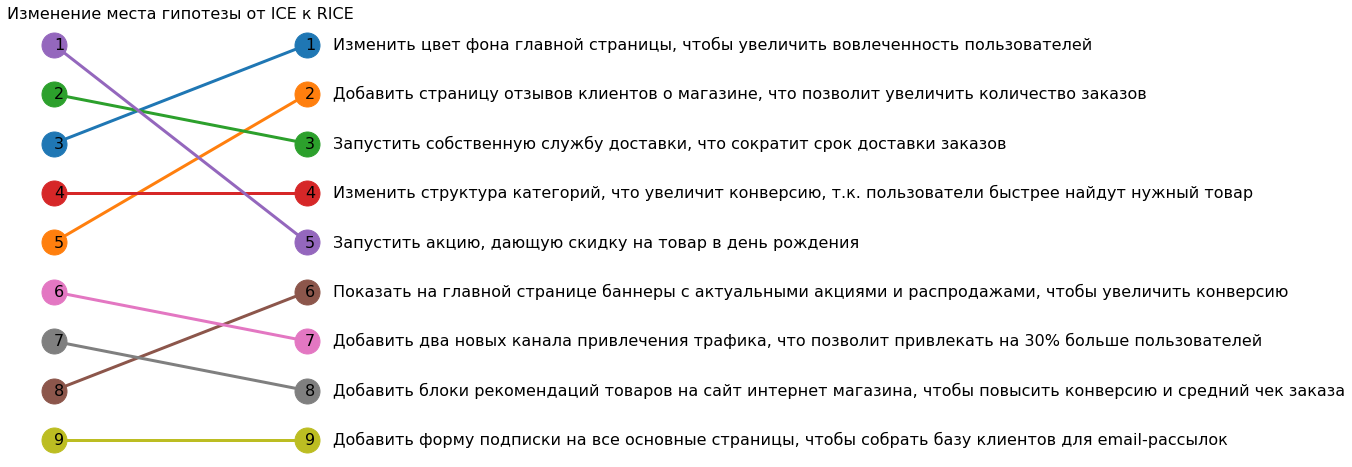

In [22]:
x = ['ICE', 'RICE']

plt.figure(figsize=(5, 8))
plt.axis('off')
plt.title("Изменение места гипотезы от ICE к RICE", fontsize=16)
for i in range(len(hypothesis_top)):
    y = [9 - hypothesis_top.ICE_index[i], 9 - hypothesis_top.RICE_index[i]]
    label = hypothesis_top.hypothesis[i]
    plt.plot(x, y, 'o-',  label=label, lw=3,ms=25)
    plt.text(0, hypothesis_top.ICE_index[i]+0.9, 9 - hypothesis_top.ICE_index[i], fontsize=16)
    plt.text(0.99, hypothesis_top.RICE_index[i]+0.9, 9 - hypothesis_top.RICE_index[i], fontsize=16)
    plt.text(1.1, hypothesis_top.RICE_index[i]+0.9, hypothesis_top.hypothesis[i], fontsize=16);

**Выводы:**
При приоритизации гипотез методом **ICE** наиболее перспективными оказались гипотезы **8, 0, 7, 6**, а при приоритизации методом **RICE** гипотезы **7, 2, 0, 6**. Разница в приоритете гипотез состоит в учете значения параметра *reach* - количество пользователей, которое затронет гипотеза. Поэтому на первое место вышла гипотеза 7 у которой параметр *reach* равен 10.

## Графический анализ метрик

Проанализируем A/B-тест для этого построим графики:
- кумулятивной выручки по группам;
- кумулятивного среднего чека по группам;
- относительного изменения кумулятивного среднего чека группы B к группе A;
- кумулятивной конверсии по группам;
- относительного изменения кумулятивной конверсии группы B к группе A;

Создадим таблицу с кумулятивными по дням данными о заказах и количестве пользователей.

In [23]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date', 'group']].drop_duplicates()

# создаем переменную с аггрегированными комулятивными по дням данными о заказах 
ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionid': 'nunique',
            'visitorid': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

# создаем переменную с аггрегированными комулятивными по дням данными о количестве пользователей 
visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

# объединяем данные о заказах и пользователях по дате и по группе
cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

Построим график кумулятивной выручки по группам.

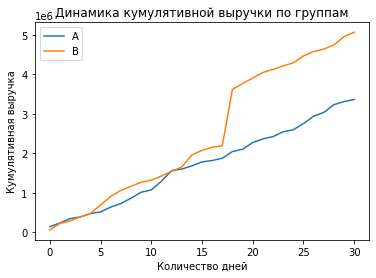

In [24]:
# кумулятивные по дням данные для группа A
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date', 'revenue', 'orders']].reset_index()

# кумулятивные по дням данные для группа B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date', 'revenue', 'orders']].reset_index()

plt.plot(cumulativeRevenueA['revenue'], label='A')

plt.plot(cumulativeRevenueB['revenue'], label='B')
plt.legend()
plt.title('Динамика кумулятивной выручки по группам')
plt.xlabel('Количество дней')
plt.ylabel('Кумулятивная выручка')
plt.show();

Выручка группы А почти равномерно увеличивается в течение всего теста. 
Графики выручки группы B примерно в середине теста резко растет. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке. Аномально большие данные необходимо будет удалить, т.к они влияют на результат. Кумулятивная выручка группы B стабильно выше, чем у группы A.

Построим графики среднего чека по группам — разделим кумулятивную выручку на кумулятивное число заказов

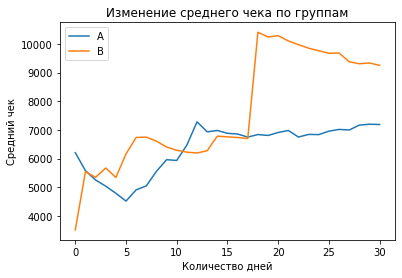

In [25]:
plt.plot(cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend()
plt.title('Изменение среднего чека по группам')
plt.xlabel('Количество дней')
plt.ylabel('Средний чек')
plt.show();

На графике виден резкий скачок среднего чека для группы B. Для группы A средний чек установился, для группы B продолжает колебаться. Возможно влияют аномально большие данные. 

Построим график относительного изменения кумулятивного среднего чека группы B к группе A.

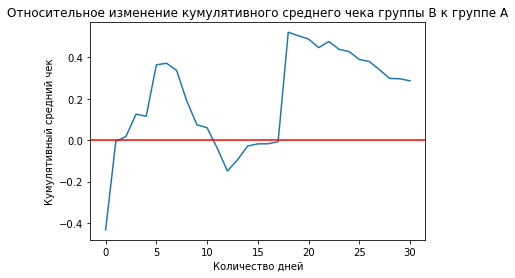

In [26]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot((mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='red', linestyle='-')
plt.title('Относительное изменение кумулятивного среднего чека группы B к группе A')
plt.xlabel('Количество дней')
plt.ylabel('Кумулятивный средний чек')
plt.show();

Результаты теста резко и значительно менялись в несколько дат, указывающих на даты совершения аномальных заказов.

Построим график кумулятивной конверсии по группам.

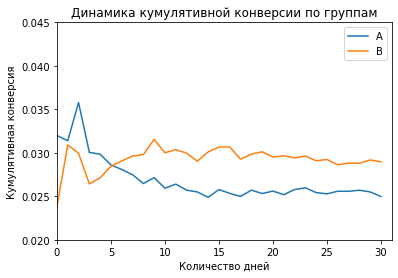

In [27]:
# расчитаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A'].reset_index()

# данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B'].reset_index()

# строим графики
plt.plot(cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['conversion'], label='B')
plt.legend()

# задаем масштаб осей
plt.axis([0, 31, 0.02, 0.045]) 
plt.title('Динамика кумулятивной конверсии по группам')
plt.xlabel('Количество дней')
plt.ylabel('Кумулятивная конверсия')
plt.show();

В начале теста группа A имела большую конверсию, но затем вперед вышла конверсия группыB. Конверсия группы B в конце теста установилась около среднего значения, конверсия группы A снижается в конце теста.

Построим график относительного изменения кумулятивной конверсии группы B к группе A;

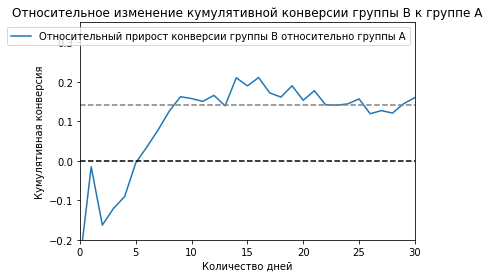

In [28]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.14, color='grey', linestyle='--')
plt.axis([0, 30, -0.2, 0.35]) 
plt.title('Относительное изменение кумулятивной конверсии группы B к группе A')
plt.xlabel('Количество дней')
plt.ylabel('Кумулятивная конверсия')
plt.show();

В целом у группы B показатели конверсии лучше группы A, в некоторые периоды конверсия группы A обгоняла группу B.

**Выводы:**
- Создали таблицу с кумулятивными по дням данными о заказах и количестве пользователей.
- Построили график кумулятивной выручки по группам. Выручка группы A равномерно увеличивается, группы B имеет резкий скачок.
- На графике среднего чека также выше показатели у группы B, виден также резкий скачок, 
- График относительного кумулятивного среднего чека имеет резкие скачки.
- Конверсия группы B установилась около среднего и значительно выше группы A. 

Для окончательных выводов необходимо проанализировать наличие выбросов в данных.

## Проверка гипотез

Для проверки наличия выбросов в данных и принятии решения по результатам теста:
- Построим точечный график количества заказов по пользователям. 
- Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей.
- Построим точечный график стоимостей заказов.
- Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов.
- Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным.
- Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.
- Посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным.
- Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.

### Определение аномального количества заказов

Построим точечный график количества заказов по пользователям.

In [29]:
ordersGroup = orders.groupby('visitorid', as_index=False).agg({'transactionid': 'nunique'})
ordersGroup.columns = ['visitorid', 'orders']
ordersGroup.sort_values(by = 'orders', ascending=False).head(10)

,visitorid,orders
908,3967698036,3
55,249864742,3
478,2108163459,3
687,2988190573,3
890,3908431265,3
138,611059232,3
632,2742574263,3
157,678354126,2
323,1404560065,2
452,1985475298,2


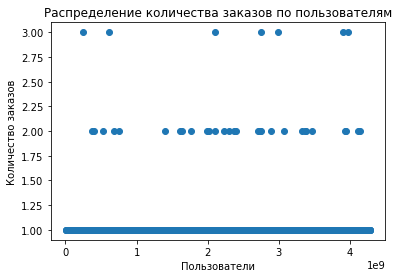

In [30]:
plt.scatter(ordersGroup['visitorid'], ordersGroup['orders'])
plt.title('Распределение количества заказов по пользователям')
plt.xlabel('Пользователи')
plt.ylabel('Количество заказов')
plt.show();

В основном большинство пользователей сделали по 1-2 заказа. Больше 2 заказов сделали единицы.

In [31]:
# считаем 95-й и 99-й перцентили количества заказов на пользователя

np.percentile(ordersGroup['orders'], [95, 99])

array([1., 2.])

Не более 5% пользователей совершали больше 1 заказа и не более 1% пользователей - больше 2. Аномальными будем считать количество заказов больше 2. 

### Определение аномальной стоимости заказов

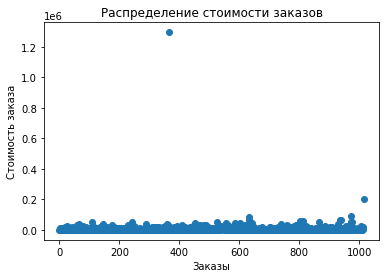

In [32]:
# строим точечный график стоимостей заказов

x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.title('Распределение стоимости заказов')
plt.xlabel('Заказы')
plt.ylabel('Стоимость заказа')
plt.show();

На графике видны выбросы - очень дорогие заказы.

In [33]:
# cчитаем 95-й и 99-й перцентили стоимости заказов
np.percentile(orders['revenue'], [95, 99])

array([26785., 53904.])

Не более 5% заказов стоят дороже 26000, и не более 1% заказов дороже 53000. Аномальными будем считать заказы на сумму более 53000.

### Проверка гипотез по "сырым" данным

Подготовим данные для проверки гипотез. Создадим таблицу со следующими столбцами:
- `date` — дата;
- `ordersPerDateA` — количество заказов в выбранную дату в группе A;
- `revenuePerDateA` — суммарная выручка в выбранную дату в группе A;
- `ordersPerDateB` — количество заказов в выбранную дату в группе B;
- `revenuePerDateB` — суммарная выручка в выбранную дату в группе B;
- `visitorsPerDateA` — количество пользователей в выбранную дату в группе A;
- `visitorsPerDateB` — количество пользователей в выбранную дату в группе B.

In [34]:
# считаем для группы A суммарное количество пользователей на каждый день
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

# считаем для группы B суммарное количество пользователей на каждый день
visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

# считаем для группы A суммарное количество заказов и выручку на каждый день
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionid', 'visitorid', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionid': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

# считаем для группы B суммарное количество заказов и выручку на каждый день
ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionid', 'visitorid', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionid': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

# объединяем все в одну таблицу по столбцу 'date'
data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
)

print(data.head(5))

        date  ordersPerDateA  revenuePerDateA  ordersPerDateB  \
0 2019-08-01              23           142779              17   
1 2019-08-02              19            91602              23   
2 2019-08-03              24           112473              14   
3 2019-08-04              11            41176              14   
4 2019-08-05              22            86383              21   

   revenuePerDateB  visitorsPerDateA  visitorsPerDateB  
0            59758               719               713  
1           162043               619               581  
2            67049               507               509  
3            96890               717               770  
4            89908               756               707  


Для рассчета статистической значимости различий в конверсии создадим переменные *ordersByUsersA* и *ordersByUsersB* со столбцами `visitorid`, `orders`. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов.

In [35]:
# переменные, содержащие число заказов для пользователя
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorid', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorid', 'orders'] 

# выборки для групп A и B с числом заказов определённого пользователя, в том числе ноль
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

Проверим предположение о том, что конверсия пользователей группы A и B отличается.

Для этого сформулируем **нулевую гипотезу: H0** — конверсия пользователей группы A **равна** конверсии пользователей группы B.

**Альтернативная гипотеза: H1** — конверсия пользователей группы A и B **различаются**.

Для проверки гипотезы будем использовать критерий Манна-Уитни, т.к. в выборках присутствуют значительные выбросы.

В случае, если полученный p-уровень значимости будет меньше принятого уровня статистической значимости, то отвергнем нулевую гипотезу, в ином случаем отвергнуть нулевую гипотезу не получится.

In [36]:
# считаем статистическую значимость различий в конверсии между группами по «сырым» данным 

alpha = 0.05  # критический уровень статистической значимости
p_value = st.mannwhitneyu(sampleA,sampleB)[1]

print ('p-значение:', "{0:.3f}".format(p_value))
if (p_value < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

print('Относительный прирост конверсии группы B:', "{0:.3f}".format((data['ordersPerDateB'].sum()/data['visitorsPerDateB'].sum())/(data['ordersPerDateA'].sum()/data['visitorsPerDateA'].sum())-1))

p-значение: 0.011
Отвергаем нулевую гипотезу
Относительный прирост конверсии группы B: 0.160


Проверим предположение о том, что средний чек пользователей группы A и B отличается.

Для этого сформулируем **нулевую гипотезу: H0** — средний чек пользователей группы A **равен** среднему чеку пользователей группы B.

**Альтернативная гипотеза: H1** — средний чек пользователей группы A и B **различаются**.

Для проверки гипотезы будем также использовать критерий Манна-Уитни.

В случае, если полученный p-уровень значимости будет меньше принятого уровня статистической значимости, то отвергнем нулевую гипотезу, в ином случаем отвергнуть нулевую гипотезу не получится.

In [37]:
# считаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным

alpha = 0.05  # критический уровень статистической значимости
p_value = st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]

print ('p-значение:', "{0:.3f}".format(p_value))
if (p_value < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

print('Относительный прирост среднего чека группы B:', '{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

p-значение: 0.829
Не получилось отвергнуть нулевую гипотезу
Относительный прирост среднего чека группы B: 0.287


### Проверка гипотез по "очищенным" данным

Очистим данные от аномальных выбросов. Для этого сделаем срезы пользователей с числом заказов больше 4, сохраним в переменную — *usersWithManyOrders* и пользователей, совершивших заказы дороже 50 000, сохраним в переменную — *usersWithExpensiveOrders*. Объединим их в таблице *abnormalUsers*.

In [38]:
# создаем переменные с указанием погоровых значений по коичеству заказов и выручки
orders_threshold = ordersGroup['orders'].quantile(0.99)
revenue_threshold = orders['revenue'].quantile(0.99)

# пользователи с аномально большим количеством заказов
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > orders_threshold]['visitorid'],
        ordersByUsersB[ordersByUsersB['orders'] > orders_threshold]['visitorid'],
    ],
    axis=0,
)


# пользователи с аномально большой стоимостью заказов
usersWithExpensiveOrders = orders[orders['revenue'] > revenue_threshold]['visitorid']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
    
)

print('Количество пользователей с аномально большим количеством и стоимостью заказов:', len(abnormalUsers))

Количество пользователей с аномально большим количеством и стоимостью заказов: 16


In [39]:
# очищенные от аномалий выборки для групп A и B с числом заказов определённого пользователя, в том числе ноль
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorid'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorid'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

Для очищенных данных проверим предположение о том, что конверсия пользователей группы A и B отличается.

Для этого сформулируем **нулевую гипотезу: H0** — конверсия пользователей группы A **равна** конверсии пользователей группы B.

**Альтернативная гипотеза: H1** — конверсия пользователей группы A и B **различаются**.

In [40]:
# считаем статистическую значимость различий в конверсии между группами по «очищенным» данным

alpha = 0.05  # критический уровень статистической значимости
p_value = st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]

print ('p-значение:', "{0:.3f}".format(p_value))
if (p_value < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

print('Относительный прирост среднего чека группы B:', '{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

p-значение: 0.007
Отвергаем нулевую гипотезу
Относительный прирост среднего чека группы B: 0.189


Для очищенных данных проверим предположение о том, что средний чек пользователей группы A и B отличается.

Для этого сформулируем **нулевую гипотезу: H0** — средний чек пользователей группы A **равен** среднему чеку пользователей группы B.

**Альтернативная гипотеза: H1** — средний чек пользователей группы A и B **различаются**.

In [41]:
# cчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным

alpha = 0.05  # критический уровень статистической значимости
p_value = st.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorid'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorid'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]

print ('p-значение:', "{0:.3f}".format(p_value))
if (p_value < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

print('Относительный прирост среднего чека группы B:', 
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorid'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorid'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

p-значение: 0.788
Не получилось отвергнуть нулевую гипотезу
Относительный прирост среднего чека группы B: -0.032


**Выводы:**
- На точечных графиках количества заказов по пользователям и стоимостей заказов обнаружили выбросы. 
- Рассчитали 95-й и 99-й перцентили количества заказов на пользователя и стоимости заказов. 
- Определили границу для аномальных пользователей на уровне 2 заказов на 1 пользователя.
- Определили границу для аномальных заказов на уровне 53000 за заказ.

**Статистическая значимость различий в конверсии и среднем чеке заказа между группами по *«сырым»* данным:**

- *P-value = 0.011* меньше 0.05, значит, что данные предоставляют достаточное основание — для выбранного уровня значимости — отвергнуть нулевую гипотезу. Можно сделать вывод, что **конверсия** пользователей группы A и B **различаются**. Относительный выигрыш группы B равен **16%**.

- *P-value = 0.829* больше 0.05, значит, нулевую гипотезу о том, что статистически значимых **различий** в **среднем чеке** между группами **нет**, не отвергаем. Относительный выигрыш среднего чека группы B равен **28.7%**.

**Статистическая значимость различий в конверсии и среднем чеке заказа между группами по *«очищенным»* данным:**

- *P-value = 0.007* меньше 0.05, значит, что данные предоставляют достаточное основание — для выбранного уровня значимости — отвергнуть нулевую гипотезу. Можно сделать вывод, что **конверсия** пользователей группы A и B **различаются**. Относительный выигрыш группы B равен **18.9%**.
- *P-value = 0.788* больше 0.05, значит, нулевую гипотезу о том, что статистически значимых **различий** в **среднем чеке** между группами **нет**, не отвергаем. Относительный проигрыш среднего чека группы B равен **3.2%**.

**Результаты A/B-теста:**

- Есть статистически значимое различие по конверсии между группами как по сырым данным, так и после фильтрации аномалий. Выигрыш группы B после фильтрации данных улучшился с **13.8% до 15.3%**.
- По сырым и по очищенным данным нет статистически значимого различия по среднему чеку между группами. Относительный выигрыш среднего чека группы B по очищенным данным упал с **25.9%** до **-0.6%**.
- График различия конверсии между группами сообщает, что результаты группы B в целом лучше группы A: но окончательно еще не установились.
- График различия среднего чека колеблется: он-то и позволил вам найти аномалии. Сделать из этого графика определённые выводы нельзя.

Исходя из всех перечисленных фактов, а также длительности теста в 31 день, установившемся среднем чеке, высокой кумулятивной выручки группы B делаем вывод, что тест необходимо остановить, завиксировать победу группы B, врядли группа A достигнет показателей группы B.

## Итоги исследования

В ходе *предобработки данных* названия столбцов были исправлены в соответствии с хорошим стилем, даты приведены к типу *datetime64*.  Дубликатов, пропусков и аномалий в данных не обнаружено. Данные подготовлены для дальнейшего анализа.

Проведена *приоритизация гипотез* методами **ICE и RICE**. Три из четырех первых гипотез одинаковые, но на первое место при приоритизации методом ICE вышла гипотеза №8, а методом RICE гипотеза №7. Это произошло в следствии большого значения параметра reach, который учитывается при приоритизации методом RICE.

При подготовке к *графическому анализу метрик* создали таблицу с кумулятивными по дням данными о заказах и количестве пользователей. На основе этой таблицы  построили:
+ график кумулятивной выручки по группам, 
+ кумулятивного среднего чека по группам, 
+ относительного изменения кумулятивного среднего чека группы B к группе A, 
+ кумулятивной конверсии по группам, 
+ относительного изменения кумулятивной конверсии группы B к группе A.

*На основе графиков сделали выводы:*
- выручка группы A и B  **увеличивается**. Для группы A равномерно, для группы B имеет резкий скачок, что может указывать на наличие аномально больших значений прибыли
- график среднего чека по группам до определенного момента рос для обоих групп, но после резкого скачка для группы B, средний чек стал снижаться, показатели среднего чека для группы B выше, чем у группы A.
- график относительного кумулятивного среднего чека имеет резкие скачки и указывает на наличие аномально больших значений.
- конверсия групп установилась около среднего и значения для группы B существенно выше группы A.

*Проанализировали наличие выбросов в данных*. Для этого построили точечные графики количества заказов для пользователей и стоимости заказов. Посчитали 95 и 99 перцентили количества заказов на пользователя и стоимости заказов.
 Установили, что:
1)	
   - не более **5%** пользователей совершали больше **1** заказа 
   - не более **1%** пользователей - больше **2**. 
   
2)   
   - не более **5%** заказов стоят дороже **26000**
   - не более **1%** заказов дороже **53000**. 

Аномальными решили считать пользователей с количеством заказов больше **2** и заказы на сумму более **53000**.

*Проверили гипотезы по «сырым» и по «очищенным» данным о наличии статистической значимости в конверсии и среднем чеке заказов.*
- Определили **наличие статистически значимого различия по конверсии** между группами как по «сырым», так и по «очищенным» данным. Показатели конверсии группы B после фильтрации выше показателей группы A  на **18.9%**.
- Определили **отсутствие** по «сырым» и по «очищенным» данным **статистически значимого различия по среднему чеку** между группами. Показатели конверсии группы B после фильтрации выше показателей группы A  на **3.2%**.
- Исходя из всех перечисленных фактов, а также длительности теста в 31 день, установившемся среднем чеке, высокой кумулятивной выручки группы B делаем вывод, что тест необходимо остановить, завиксировать победу группы B, врядли группа A достигнет показателей группы B.
